<a href="https://colab.research.google.com/github/TashiNyangmi/Understood/blob/colab/Understood_org2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

08/06/2020
Thursday
Understood Take Home

In [245]:
# Importing libraries
import pandas as pd #used
import numpy as np 
import matplotlib.pyplot as plt # visualization
# causes the plots to appear inline and remain in the document
%matplotlib inline 
import seaborn as sns # visualization

from scipy import stats # for t-test

In [99]:
# Importing dataset from Github
url = 'https://raw.githubusercontent.com/TashiNyangmi/Understood/master/Mroz.csv'
df_org = pd.read_csv(url)

In [226]:
# Data Dictionary

# URL to data dictionaries:
# Dr. Ronen provided: https://www.rdocumentation.org/packages/npsf/versions/0.4.2/topics/mroz
# I used : https://rdrr.io/rforge/Ecdat/man/Mroz.html

# Defining the data dictionary
data_dict = { 'work'    : 'if in labor force in 1975', # exception: here used value of the key "inlf" from link Dr. Ronen provided (original value = Work at home in 1975?)
              'hoursw'  : 'wife\'s hours of work in 1975',
              'child6'  : '# of childredn below 6',
              'child618': '# of childredn between 6 and 18',
              'agew'    : 'wife\'s age',
              'educw'   : 'wife\'s educaitonal attainment in years',
              'hearnw'  : 'wife\'s average hourly earnings, in 1975 $',
              'wagew'   : 'wife\'s wage reported at the time of the 1976 interview',
              'hoursh'  : 'husband\'s hours worked in 1975',
              'ageh'    : 'husband\'s age',
              'educh'   : 'husband\'s educational attainment, in years',
              'wageh'   : 'husband\'s wage, in 1975 dollars',
              'income'  : 'family income, in 1975 dollars',
              'educwm'  : 'wife\'s mother\'s educational attainment, in years',
              'educwf'  : 'wife\'s father\'s educational attainment, in years',
              'unemprate': 'unemployment rate in country of residence, in percentage points',
              'city'    : 'lives in large city (SMSA)?',
              'experience' : 'actual years of wife\'s previous labor market experience'}

In [113]:
# List of attributes provided in the instructions
col_list = ['work','child6','child618','agew','educw','ageh','educh','educwm', 'educwf','unemprate','city']

In [114]:
col_list.append(df_org.columns[0]) # adding the first column for an additional index (useful for visualization later)

In [ ]:
# Limiting the dataset to provided attributes (as instructed)
df = df_org[col_list].copy()
df.head()

In [117]:
# Renaming the col "Unnamed: 0" to "id"
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)

EDA

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [217]:
df.describe()

,work,city
count,753,753
unique,2,2
top,no,yes
freq,428,484


In [218]:
# including non-numeric columns
df.describe(include=['object', 'bool'])

,work,city
count,753,753
unique,2,2
top,no,yes
freq,428,484


In [223]:
# PERCENTAGE of people in labor force
df['work'].value_counts(normalize = True)

no     0.568393
yes    0.431607
Name: work, dtype: float64

In [228]:
# PERCENTAGE of people living in SMSA (big city)
df['city'].value_counts(normalize = True)

yes    0.642762
no     0.357238
Name: city, dtype: float64

In [ ]:
# Checking duplicate Rows and columns
df[df.duplicated()]

In [ ]:
# Creat a new DataFrame df_temp and melt for visualization
df_temp = df.copy()

In [272]:
col_melt = list(df_temp.columns[0:-2])
col_melt.append(df_temp.columns[-1])
col_melt

['work', 'value']

In [198]:
# Melting df_temp
# copy pasted from output above, find a better way
df_temp = pd.melt(df_temp, id_vars=['work'], value_vars=[                                           
 'child6',
 'child618',
 'agew',
 'educw',
 'ageh',
 'educh',
 'educwm',
 'educwf',
 'unemprate',])

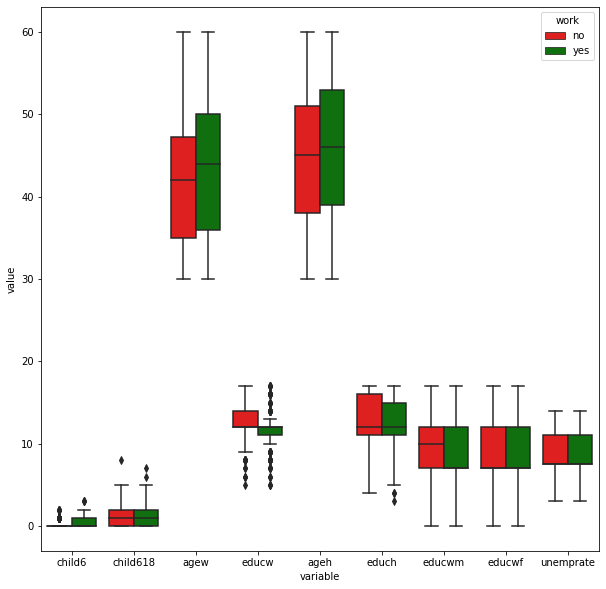

In [213]:
plt.figure(figsize=(10,10))
sns.boxplot(x="variable", y="value", hue = 'work',data=df_temp, palette= {'no':'red', 'yes':'green'})

Observation: 

In [205]:
# Let us zoom in on the figure without the age variables
# Combine these two
df_temp1 = df_temp.copy()
df_temp1 = df_temp[df_temp['variable'] != 'agew']
df_temp1 = df_temp1[df_temp1['variable'] != 'ageh']

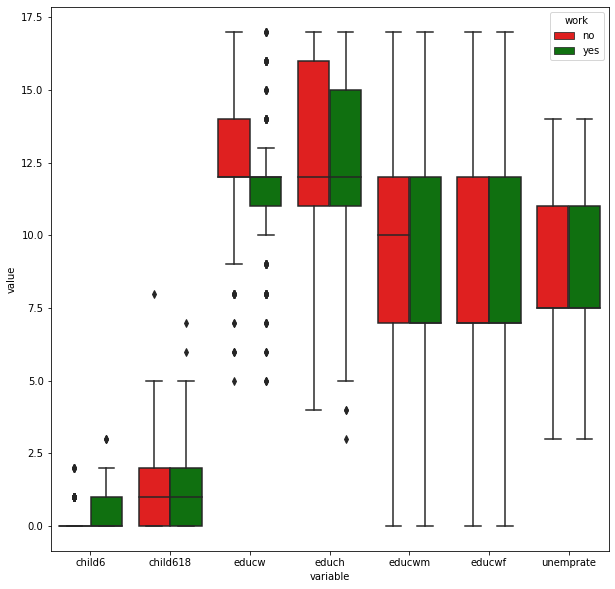

In [214]:
plt.figure(figsize=(10,10))
sns.boxplot(x="variable", y="value", hue = 'work', data=df_temp1, palette= {'no':'red', 'yes':'green'})

Histograms for each variable

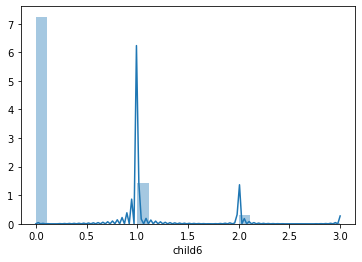

In [229]:
sns.distplot(df['child6'])

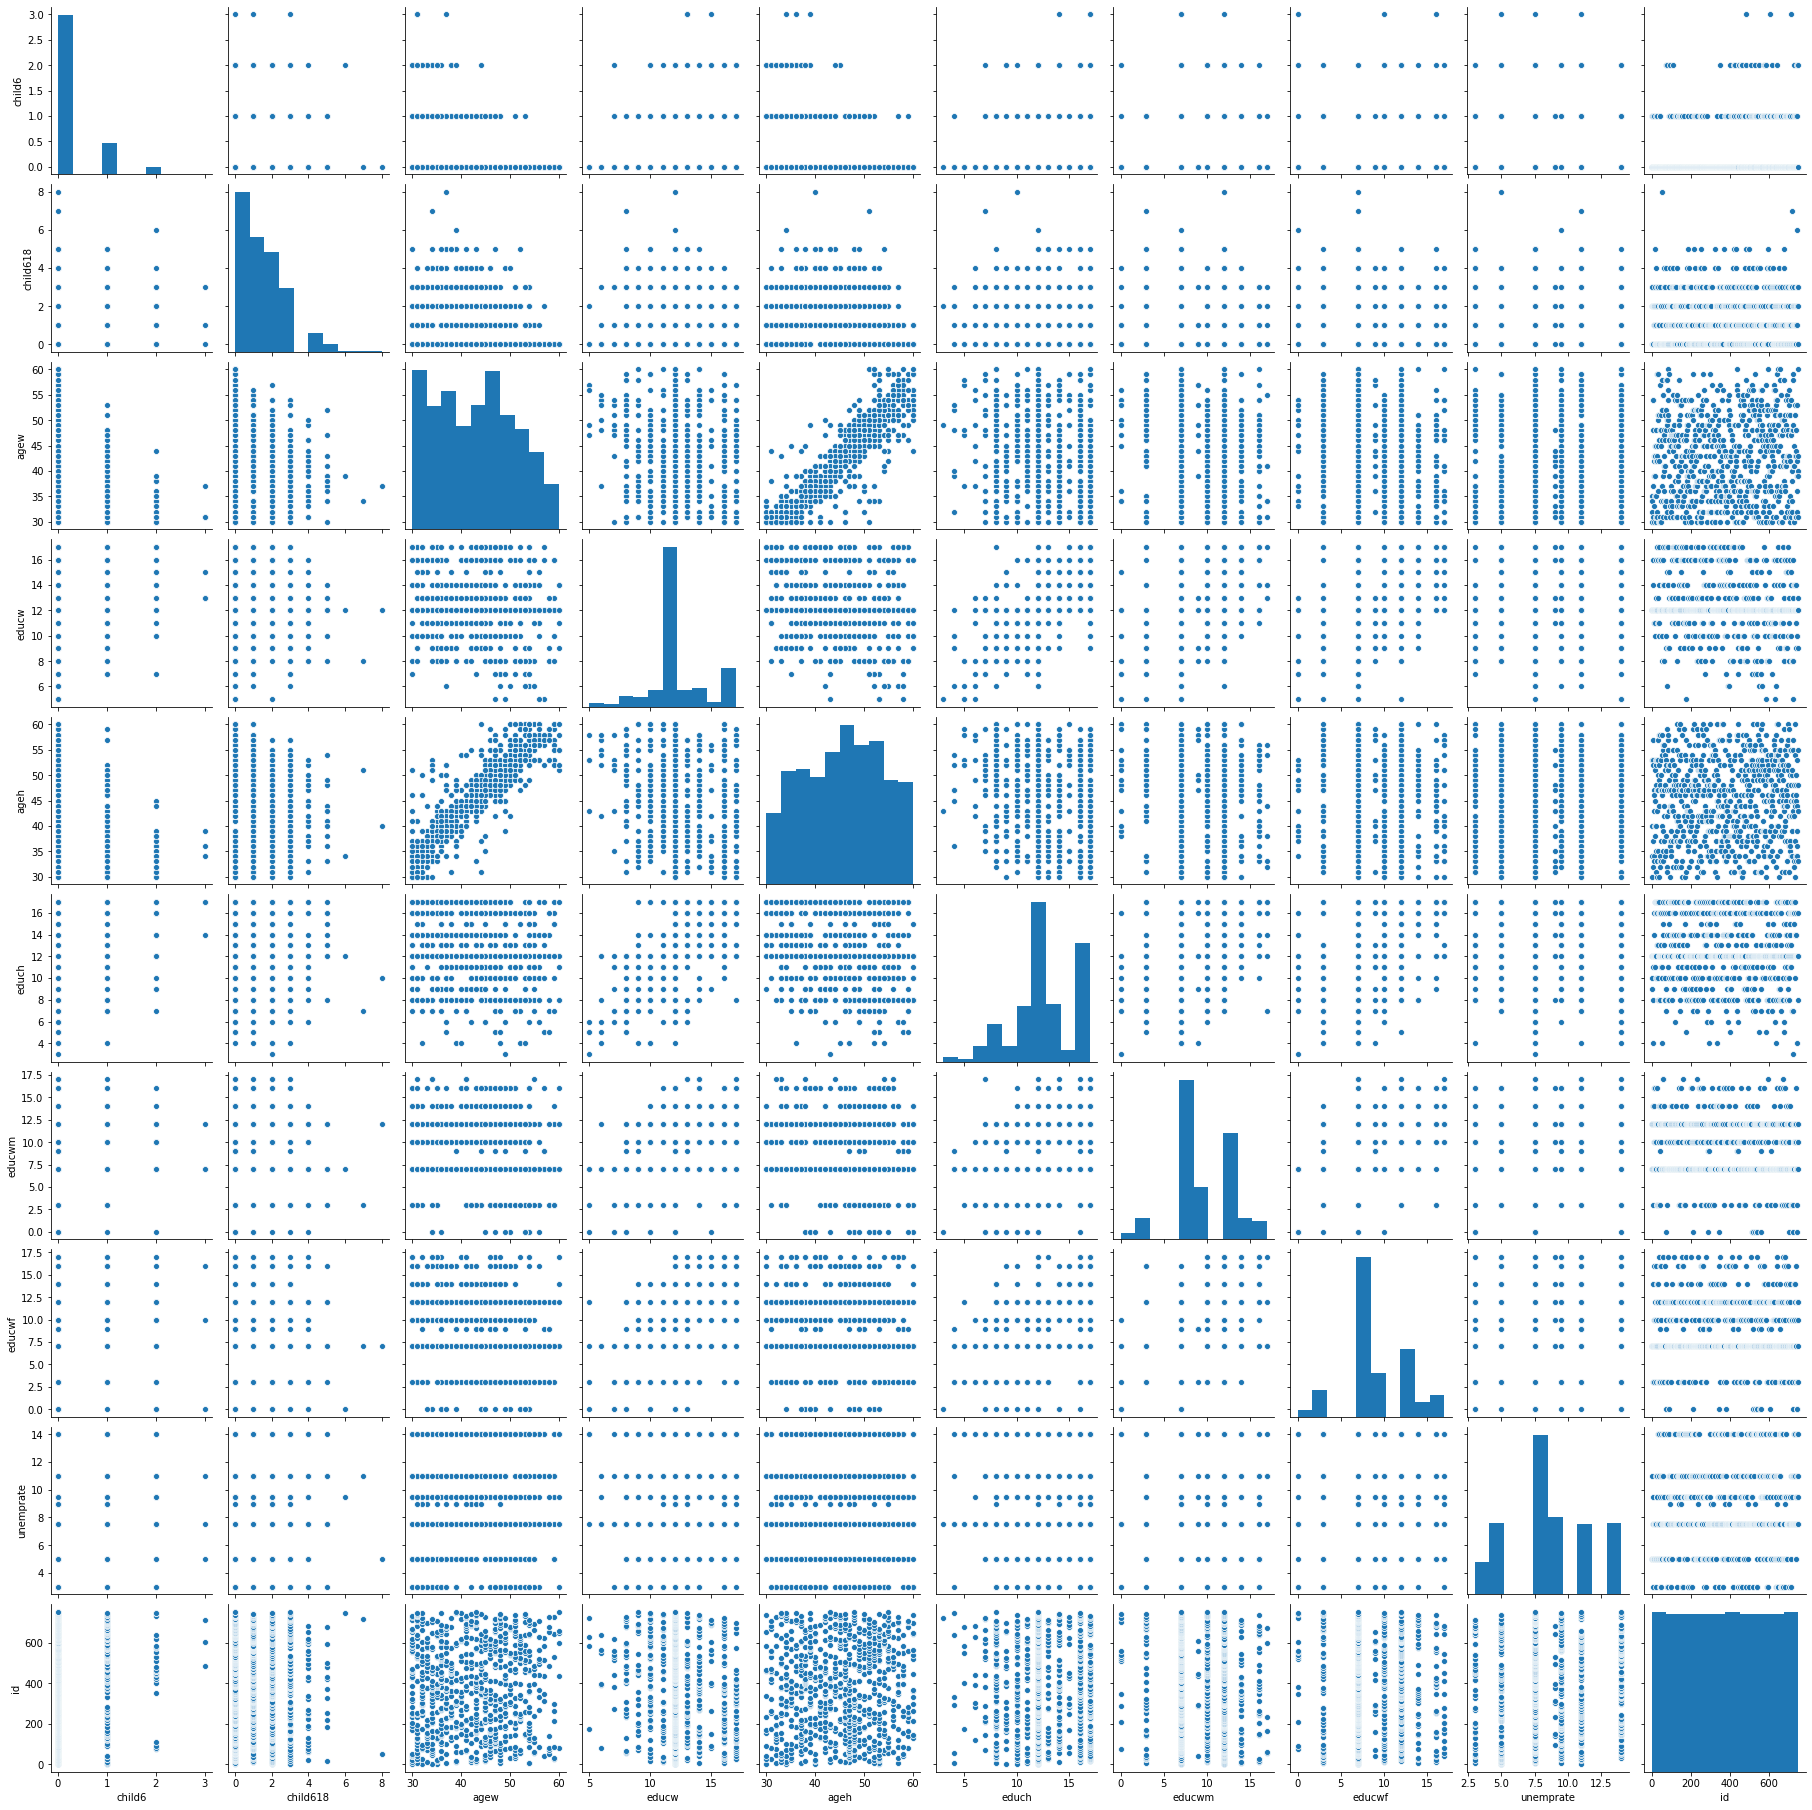

In [230]:
sns.pairplot(df)

Observations:

1.   agew and ageh highly and positively corelated
2.   eduw and eduh are also positively corelated but corelation is weak
3.   the values for educw is highly concentrated towards the mean, followed closely by educh






In [235]:
df['child6'].value_counts(normalize = True)

0    0.804781
1    0.156707
2    0.034529
3    0.003984
Name: child6, dtype: float64

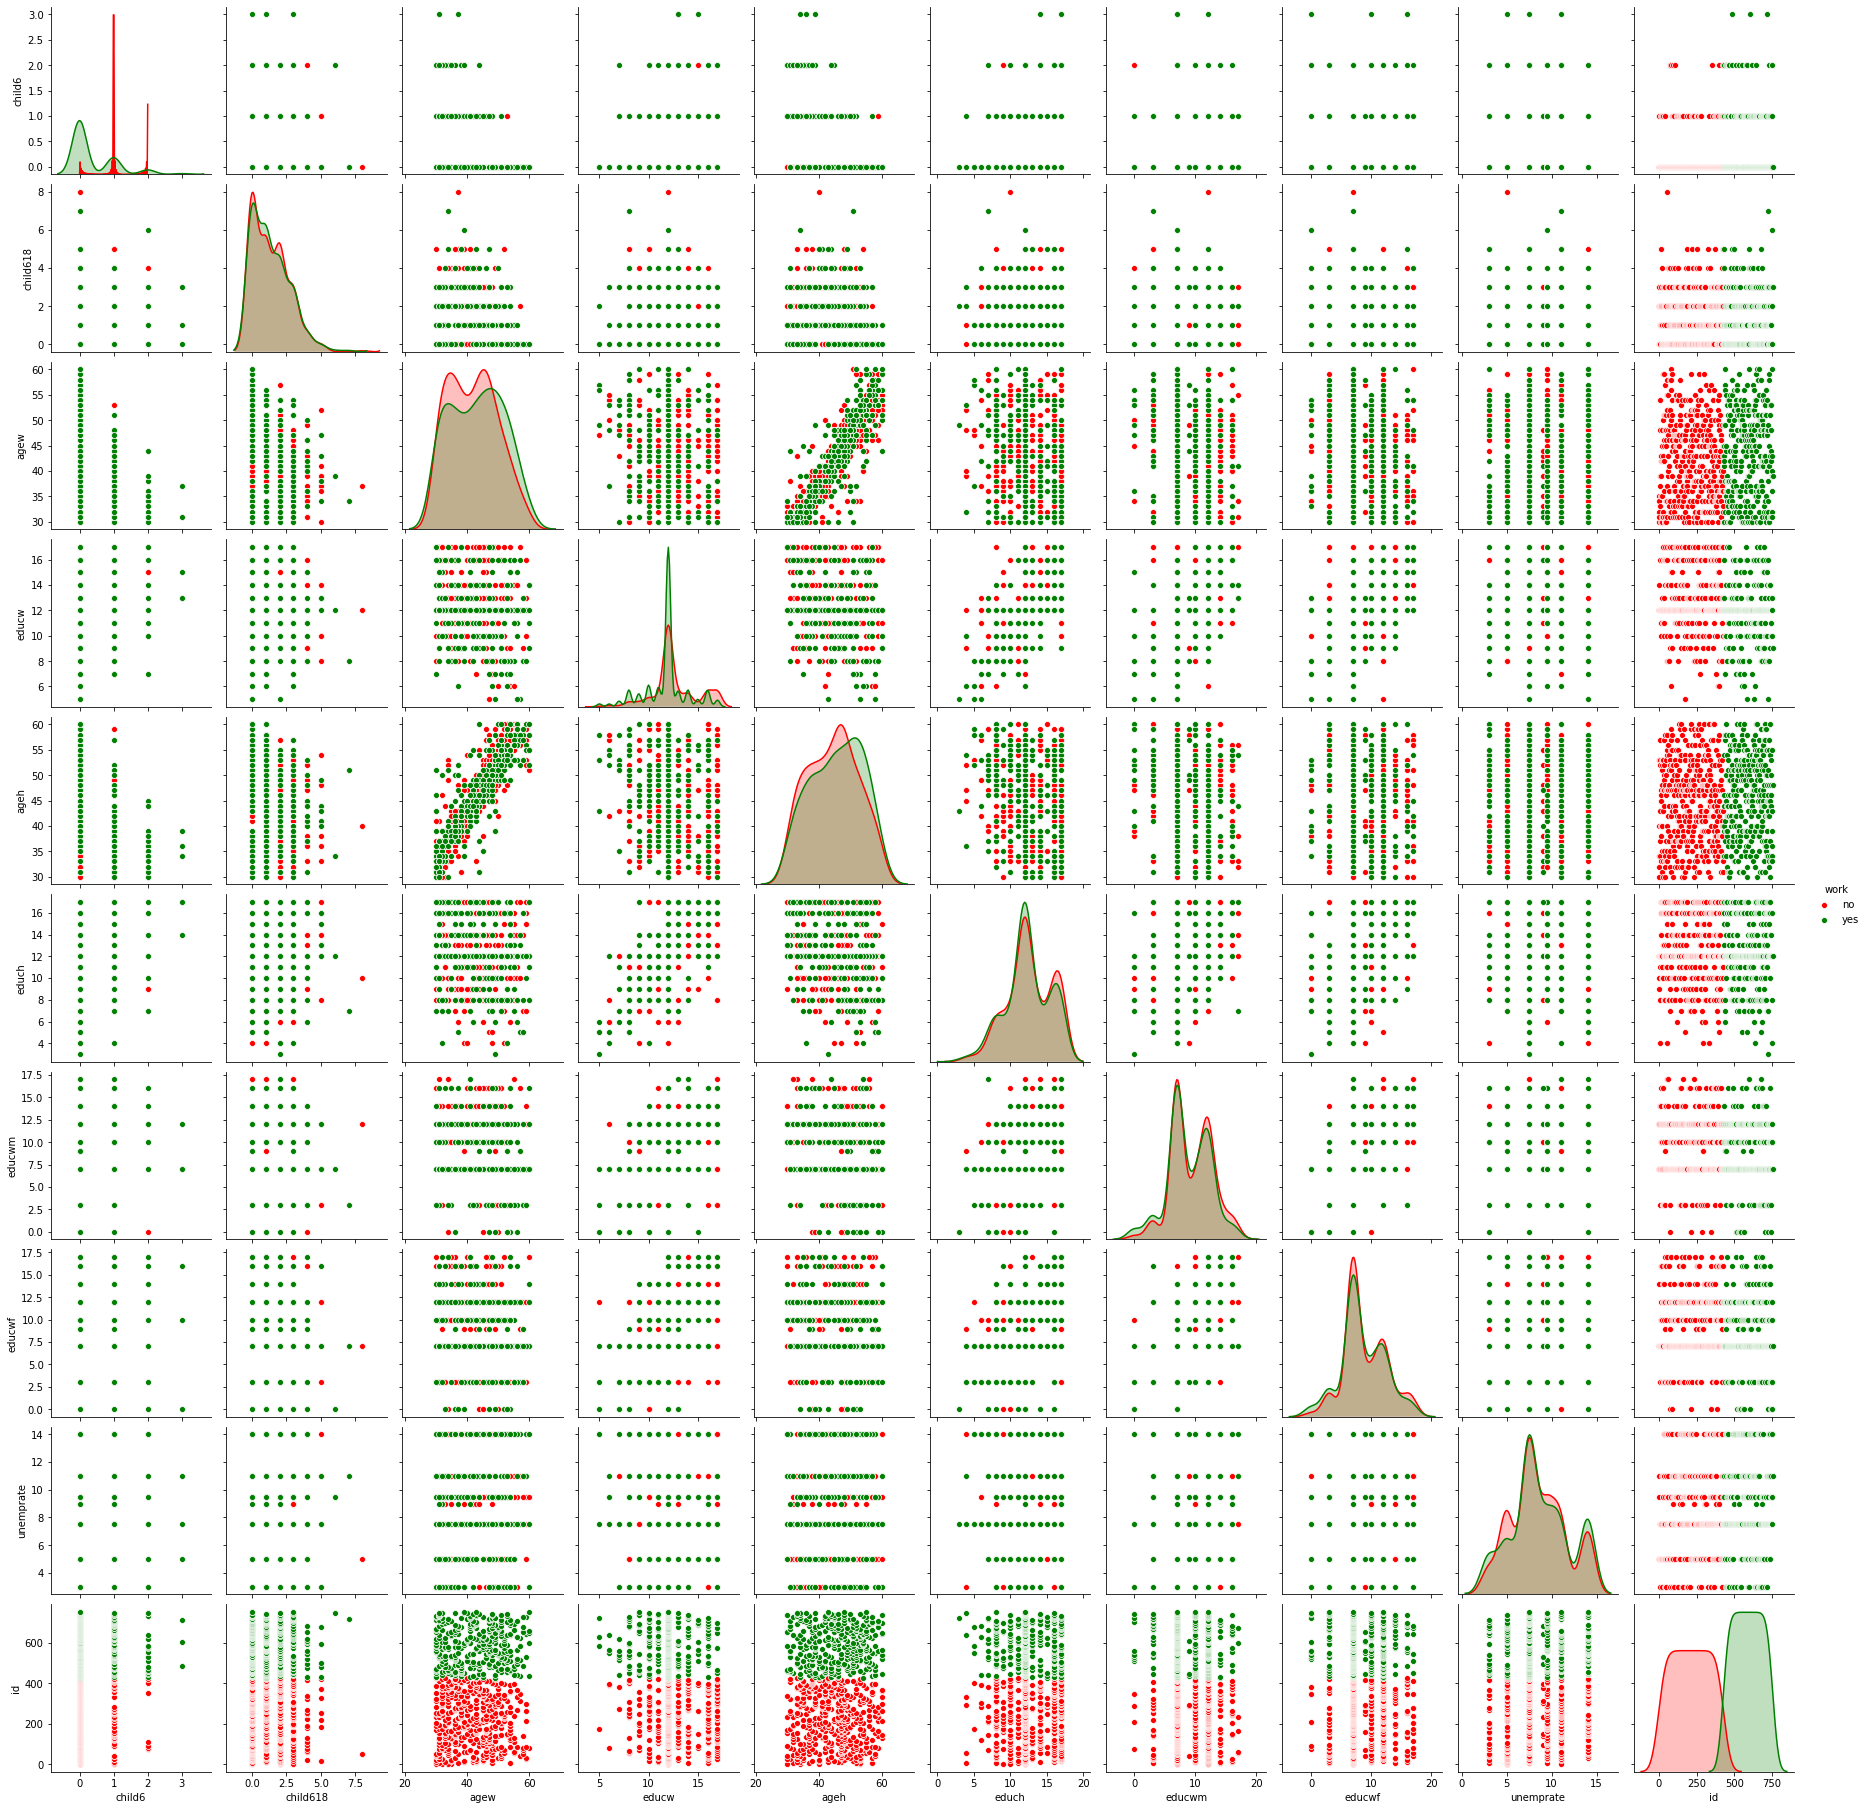

In [236]:
sns.pairplot(data = df, hue = 'work', palette={'yes' : 'green', 'no':'red'})

Observations:

1.   agew and ageh highly and positively corelated; corelation is stronger for individuals that have work
2.   eduw and eduh are also positively corelated but corelation is weak; corelation is stronger for individuals that have work
3.   the values for educw is highly concentrated towards the mean, followed closely by educh; concentration is higher for both educw and educh for individuals that have work






In [238]:
df.groupby(['child6']).agg(np.mean)

,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,id
child6,,,,,,,,,
0,1.278878,44.316832,12.188119,46.910891,12.308581,9.056106,8.620462,8.625413,358.805281
1,1.745763,35.720339,12.508475,38.432203,13.110169,10.025424,9.593220,8.677966,446.059322
2,1.307692,33.115385,13.423077,34.769231,13.538462,10.346154,9.653846,8.423077,461.769231
3,1.333333,33.000000,13.666667,36.333333,16.000000,8.666667,8.666667,7.833333,601.333333


In [241]:
df.groupby(['work']).agg(np.mean)

,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,id
work,,,,,,,,,,
no,0.140187,1.350467,41.971963,12.658879,44.609813,12.612150,9.516355,8.988318,8.545561,214.5
yes,0.366154,1.356923,43.283077,11.796923,45.793846,12.332308,8.901538,8.572308,8.726154,591.0


1st Hypothesis:
individuals without work are more likely to not have a child under 6 (which is counterintuitive)
1.   Null:
2.   Alternative:






In [244]:
# Seperating column:child6  based on columnwork
v1_no = df[df["work"]=="no"]["child6"]
v2_yes = df[df["work"] =="yes"]["child6"]

In [316]:
# Conducting t-test using Scipy
# 2-tailed test for the null hypothesis that 2 independent samples have identical average(expected) values. This test assumes the populations have equal variance by default
stats.ttest_ind(v2_yes, v1_no) 


Ttest_indResult(statistic=5.996248963331758, pvalue=3.1359589130967792e-09)

We get a pvalue of 3.14* e-09, which is extremely small. It is smaller than alpha = 0.01. Hence, we can reject the null hypothesis. Note: to get pvalue for 1 tailed test(which is what we are interested in), divide the p-value by 2.

[Text(0.5, 0, 'No. of children aged 6 and under')]

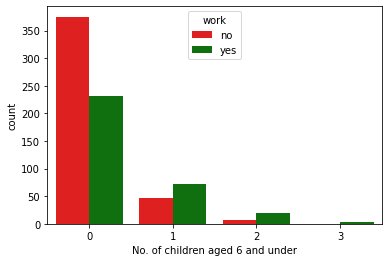

In [317]:
cp = sns.countplot(x = "child6", data = df, hue = "work", palette= {"no": "red", "yes": "green"})
cp.set(xlabel="No. of children aged 6 and under")

Observation: If you look at the sub-group of individuals with child6 = 0, we see that a higher percentage of the sub-group is not working. However, once child6 > 0, it is more likely that the individual is working.

Perhaps, the confouding variable here could be age, younger individuals might be unemployed and have no kids. Let us explore that next

In [324]:
df.head()

,work,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,city,id
0,no,1,0,32,12,34,12,12,7,5.0,no,1
1,no,0,2,30,12,30,9,7,7,11.0,yes,2
2,no,1,3,35,12,40,12,12,7,5.0,no,3
3,no,0,3,34,12,53,10,7,7,5.0,no,4
4,no,1,2,31,14,32,12,12,14,9.5,yes,5


In [335]:
df["work"].value_counts(normalize = True)

no     0.568393
yes    0.431607
Name: work, dtype: float64

[Text(0, 0.5, 'no of individuals (not/) working'),
 Text(0.5, 0, 'age of women')]

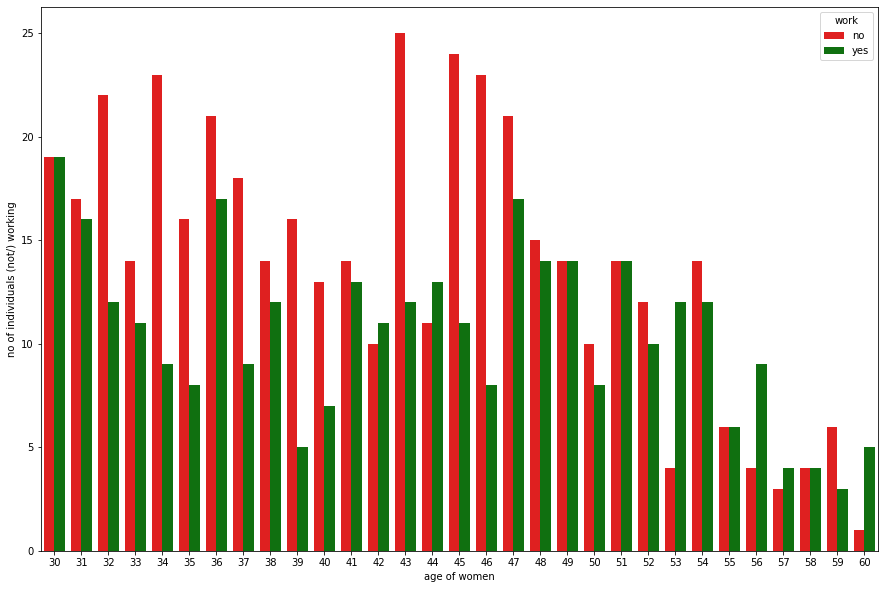

In [332]:
plt.figure(figsize=(15,10))
cp = sns.countplot(x = "agew", data = df, hue = "work", palette= {"no": "red", "yes": "green"})
cp.set(xlabel="age of women", ylabel= "no of individuals (not/) working")

Lets use Logistic regression to test if age can predict unemployment

In [365]:
#loading sklearn modules
from sklearn.model_selection import train_test_split
from sklearn import metrics # for confucion metrics
from sklearn.datasets import load_digits

In [380]:
# assigning data, and target
target = np.array(df["work"])
data = np.array(df["agew"]).reshape(-1,1)

In [393]:
# Splitting the data into Training and Test sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 0)

In [395]:
# SkLearn 4 step modeling pattern
from sklearn.linear_model import LogisticRegression

In [396]:
logisticRegr = LogisticRegression()

In [397]:
logisticRegr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

2nd Hypothesis: The age difference between husband and wife is higher for the sub-group that is not-working vs the sub-group that is working


1.   Null: age_diff_yeswork = age_diff_nowork
>  i.e. age_diff_nowork - age_diff_yeswork = 0
2.   Alternate: age_diff_nowork < age_diff_yeswork
>  i.e. age_diff_nowork - age_diff_yeswork > 0
